In [41]:
import numpy as np
import matplotlib.pyplot as plt 

# Test



In [42]:
from mendeleev.fetch import fetch_table

elements_table = fetch_table('elements')


def retrieve_vdw_radii(molecule, elements_table):
    """ 
    Retrieves the VDW radii using mendeleev
    """

    cols = [
        "atomic_number",
        "symbol",
        "vdw_radius"
    ]
    elements_table = elements_table[cols]

    vdw_radii = dict.fromkeys(molecule.atoms.keys())


    for key in molecule.atoms.keys():
        remove_digits = str.maketrans("","",digits)
        key_without_digit = key.translate(remove_digits)
        vdw_radius_key = elements_table[elements_table["symbol"]==key_without_digit]["vdw_radius"].values[0]
        vdw_radii[key] = vdw_radius_key

    return vdw_radii

def retrieve_vdw_radii(element, elements_table):

    cols = [
        "atomic_number",
        "symbol",
        "vdw_radius"]

    elements_table = elements_table[cols]
    vdw_radius = elements_table[elements_table["symbol"]==element]["vdw_radius"].values[0]
    return vdw_radius / 100 # Ängstroooom

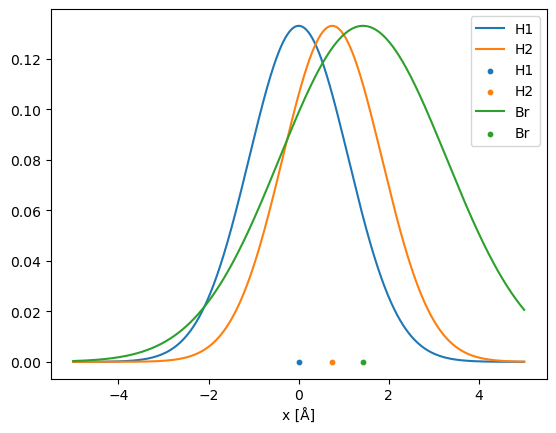

In [43]:
H1 = 0.0
H2 = 0.7430
Br = 1.42585
Cl = 1.278033
I = 1.0571369
F = 0.9112

vdw_H,vdw_Br,vdw_Cl,vdw_I,vdw_F = retrieve_vdw_radii("H",elements_table),retrieve_vdw_radii("Br",elements_table),retrieve_vdw_radii("Cl",elements_table),retrieve_vdw_radii("I",elements_table),retrieve_vdw_radii("F",elements_table)


a = 1/(3 * np.sqrt(2 * np.pi))

def gaussian(a,r_0,c):
    """ 
    Initializes a Gausian function on the point r_0 with coefficient c_i
    """
    exponent = -(x- r_0)**2 / (2*c**2)
    return a * np.exp(exponent)

x = np.linspace(-5,5,1000)

plt.plot(x,gaussian(a,H1,vdw_H),label="H1")
plt.plot(x,gaussian(a,H2,vdw_H),label="H2")
plt.scatter(0,0,label="H1",s=10)
plt.scatter(0.743,0,label="H2",s=10)
plt.plot(x,gaussian(a,Br,vdw_Br),label="Br")
plt.scatter(1.42585,0,label="Br",s=10)
#plt.plot(x,gaussian(a,Cl,vdw_Cl),label="Cl")
#plt.plot(x,gaussian(a,I,vdw_I),label="I")
#plt.plot(x,gaussian(a,F,vdw_F),label="F")
plt.xlabel("x [Å]")

plt.legend()
plt.show()



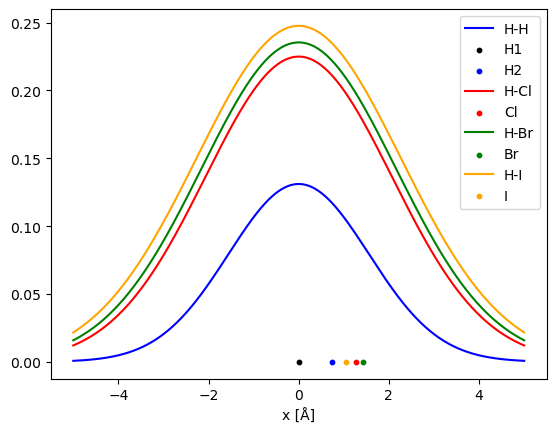

In [77]:
def S(a1,a2,c1,c2,r):
    exponent = -(r**2)/(2* (c1**2 + c2**2))
    prefactor = a1 * a2 * ((2 * np.pi * c1**2 * c2**2)/(c1**2 + c2**2))**(3/2)
    return prefactor * np.exp(exponent)

x = np.linspace(-5,5,1000)
S_HH = S(a,a,vdw_H,vdw_H,x)
S_Cl = S(a,a,vdw_H,vdw_Cl,x)
S_HBr = S(a,a,vdw_H,vdw_Br,x)
S_HI = S(a,a,vdw_H,vdw_I,x)


plt.plot(x,S_HH,label="H-H", color="blue")
plt.scatter(0, 0, label="H1", s=10,color="black")
plt.scatter(0.743, 0, label="H2", s=10, color = "blue")
plt.plot(x,S_Cl,label="H-Cl", color="red")
plt.scatter(1.278033, 0, label="Cl", s=10, color = "red")
plt.plot(x,S_HBr,label="H-Br", color="green")
plt.scatter(1.42585, 0, label="Br", s=10, color = "green")
plt.plot(x,S_HI,label="H-I", color="orange")
plt.scatter(1.0571369, 0, label="I", s=10, color = "orange")
plt.xlabel("x [Å]")

plt.legend()
plt.show()



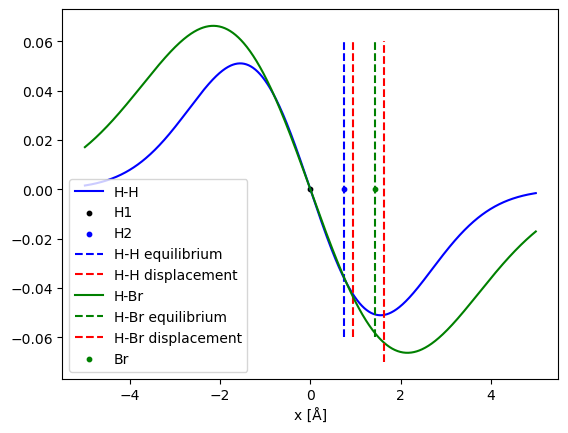

In [76]:
def S_prime(a1,a2,c1,c2,r):
    exponent = -(r**2)/(2* (c1**2 + c2**2))
    derivative_factor = - (2 * r) / (2 * (c1**2 + c2**2))
    prefactor = a1 * a2 * ((2 * np.pi * c1**2 * c2**2)/(c1**2 + c2**2))**(3/2)
    return prefactor * np.exp(exponent) * derivative_factor

r = np.linspace(-5,5,1000)
S_HH_prime = S_prime(a,a,vdw_H,vdw_H,r)
S_HBr_prime = S_prime(a,a,vdw_H,vdw_Br,r)
S_HCl_prime = S_prime(a,a,vdw_H,vdw_Cl,r)

plt.plot(r,S_HH_prime,label="H-H", color="blue")
plt.scatter(0, 0, label="H1", s=10, color = "black")
plt.scatter(0.743, 0, label="H2", s=10, color ="blue")
plt.vlines(0.743, -0.06, 0.06, color="blue", linestyle="dashed", label="H-H equilibrium")
plt.vlines(0.943, -0.06, 0.06, color="red", linestyle="dashed", label="H-H displacement")
plt.plot(r,S_HBr_prime,label="H-Br", color="green")
plt.vlines(1.42585, -0.06, 0.06, color="green", linestyle="dashed", label="H-Br equilibrium")
plt.vlines(1.62585, -0.07, 0.06, color="red", linestyle="dashed", label="H-Br displacement")
plt.scatter(1.42585, 0, label="Br", s=10, color = "green")
#plt.plot(r,S_HCl_prime,label="H-Cl", color="red")
#plt.vlines(1.278033, -0.06, 0.06, color="red", linestyle="dashed", label="H-Cl equilibrium")
#plt.vlines(1.478033, -0.06, 0.06, color="red", linestyle="dashed", label="H-Cl displacement")
#plt.scatter(1.278033, 0, label="Cl", s=10, color = "red")
plt.xlabel("x [Å]")
plt.legend()
plt.show()

In [72]:
import math

# Vector 1: (HX1, HY1, HZ1) = (-0.00000, -0.00000, 0.70436)
vector1 = (-0.00000, -0.00000, 0.70436)
norm1 = math.sqrt(vector1[0]**2 + vector1[1]**2 + vector1[2]**2)

# Vector 2: (HX2, HY2, HZ2) = (-0.00000, -0.00000, -0.70436)
vector2 = (-0.00000, -0.00000, -0.70436)
norm2 = math.sqrt(vector2[0]**2 + vector2[1]**2 + vector2[2]**2)

print(f"Norm of vector 1: {norm1:.5f}")
print(f"Norm of vector 2: {norm2:.5f}")

Norm of vector 1: 0.70436
Norm of vector 2: 0.70436
